## $g_*(T)$

In [1]:
import numpy as np
import scipy.integrate as spint

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [10]:
rcParams.update({'font.size': 22})

---

#### $J_\pm(x)$

In [12]:
def J_plus(x):
    x2 = x**2
    def kernel(xi):
        xi2 = xi**2
        sq = np.sqrt(xi2 + x2)
        return xi2 * sq / (np.exp(sq, dtype=np.float128) + 1) # 128 bits for exp, otherwise overflow warning
    
    return spint.quad(kernel, 0, np.Inf, epsabs=0, epsrel=1e-3)[0]

def J_minus(x):
    x2 = x**2
    def kernel(xi):
        xi2 = xi**2
        sq = np.sqrt(xi2 + x2)
        return xi2 * sq / (np.exp(sq, dtype=np.float128) - 1)
    
    return spint.quad(kernel, 0, np.Inf, epsabs=0, epsrel=1e-3)[0]

def xexp_ref(x):
    '''reference for x >> 1'''
    return np.sqrt(np.pi/2) * x**2.5 * np.exp(-x)

In [4]:
# simple test for x = 0
print(J_plus(0) / (7/8*np.pi**4/15))
print(J_minus(0) / (np.pi**4/15))

1.0000000009212
1.0000000008060936


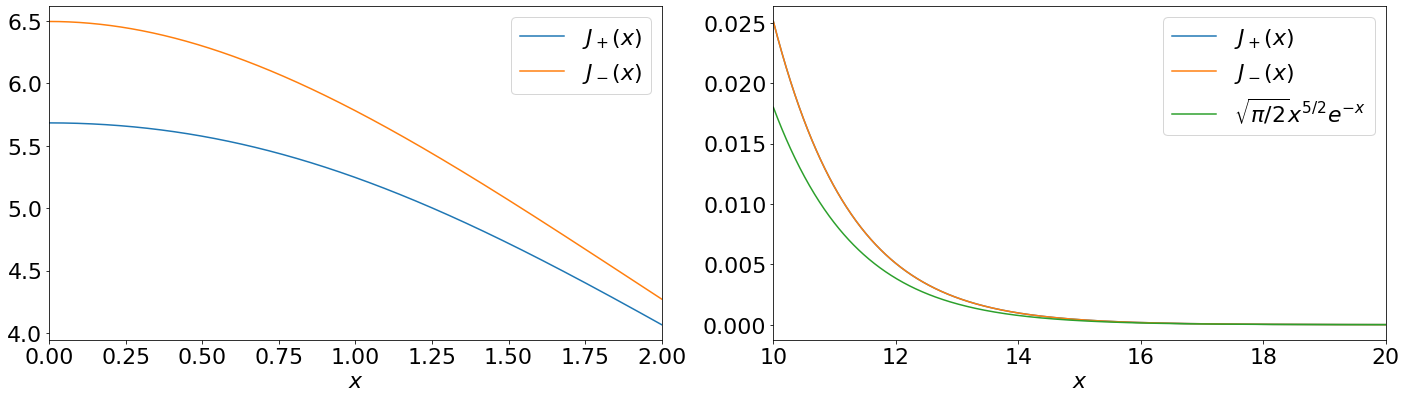

In [18]:
# a simple plot for J(x)
fig, (ax, ay) = plt.subplots(1, 2, figsize=(20, 6), tight_layout=True)

# small x
xs = np.linspace(0, 2, 1000)
J_ps = np.array([J_plus(x) for x in xs])
J_ms = np.array([J_minus(x) for x in xs])
ax.plot(xs, J_ps, label=r'$J_+(x)$')
ax.plot(xs, J_ms, label=r'$J_-(x)$')

ax.set_xlim(0, 2)
ax.set_xlabel('$x$')
ax.legend()

# large x
xs = np.linspace(10, 20, 1000)
J_ps = np.array([J_plus(x) for x in xs])
J_ms = np.array([J_minus(x) for x in xs])
xexps = np.array([xexp_ref(x) for x in xs])
ay.plot(xs, J_ps, label=r'$J_+(x)$')
ay.plot(xs, J_ms, label=r'$J_-(x)$')
ay.plot(xs, xexps, label=r'$\sqrt{\pi/2}x^{5/2}e^{-x}$')

ay.set_xlim(10, 20)
ay.set_xlabel('$x$')
ay.legend()

plt.show()

---

In [30]:
def g_star(T, b_gs, b_ms, f_gs, f_ms):
    '''b_gs etc. are arrays w/ all species'''
    print('g_start w/ x=0: {:.2f}'.format(np.sum(b_gs) + 7/8*np.sum(f_gs)))
    b_Js = np.array([J_minus(m/T) for m in b_ms])
    f_Js = np.array([J_plus(m/T) for m in f_ms])
    return 15/np.pi**4 * (np.sum(b_gs*b_Js) + np.sum(f_gs*f_Js))

In [21]:
# all the values are in unit of GeV

boson_ms = { # masses of bosons
    'photon' : 0, 'W+' : 80, 'W-' : 80, 'Z0' : 91, 'gluon' : 0, 'Higgs' : 125}

fermion_ms = { # masses of fermions
    'quark_t' : 173, 'quark_b' : 4, 'quark_c' : 1, 'quark_s' : 100 / 10**3, 'quark_d' : 5 / 10**3,
    'quark_u' : 2 / 10**3, 'lepton_tau' : 1777 / 10**3, 'lepton_mu' : 106 / 10**3,
    'lepton_e' : 511 / 10**6, 'neutrino' : 0 # < 0.6 eV, so just ignore them
}

boson_gs = { # dof, including polarization or spin states
    'photon' : 2, 'W+' : 3, 'W-' : 3, 'Z0' : 3, 'gluon' : 8 * 2, 'Higgs' : 1
}

fermion_gs = { # dof, including polarization or spin states
    'quark_t' : 12, 'quark_b' : 12, 'quark_c' : 12, 'quark_s' : 12, 'quark_d' : 12,
    'quark_u' : 12, 'lepton_tau' : 4, 'lepton_mu' : 4,
    'lepton_e' : 4, 'neutrino' : 3 * 2
}

In [46]:
all_species = np.array(list(boson_ms.keys()) + list(fermion_ms.keys()))
print(all_species)

['photon' 'W+' 'W-' 'Z0' 'gluon' 'Higgs' 'quark_t' 'quark_b' 'quark_c'
 'quark_s' 'quark_d' 'quark_u' 'lepton_tau' 'lepton_mu' 'lepton_e'
 'neutrino']


In [52]:
def rm_sps(arr, rms):
    new_arr = arr.copy()
    for rms_ in rms:
        new_arr = new_arr[new_arr != rms_]
    return new_arr

In [50]:
# temperature decades in GeV
Ts = np.array([10000, 30, 10, ])

species = np.array([all_species])
sps = rm_sps(all_species, ['quark_t'])
species.append(sps)
sps = rm_sps(sps, ['Higgs', 'W+', 'W-', 'Z0'])
species.append(sps)
sps = rm_sps(sps, ['quark_b'])
species.append(sps)
sps = rm_sps(sps, ['quark_c', 'lepton_tau'])
species.append(sps)